# Lab 2 - Exploring and manipulating data. 
Here is what we we do:
1. Read in the data from a CSV file and do simple visualizations
2. Look for patterns in the data
3. Deal with missing values
4. Add in new features
5. Split and graph

### Read the CSV file:
We will use info() on the data frame to get a first look.  This is mostly a quick sanity check

In [1]:
import pandas as pd
howell_full = pd.read_csv("Howell.csv", sep=";")

### A Better Plot

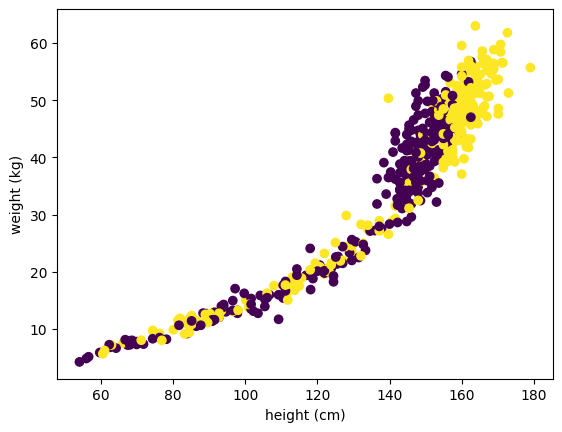

In [2]:
import matplotlib.pyplot as plt
height = howell_full['height']
weight = howell_full['weight']
# plt.scatter(height, weight)
# plt.xlabel('height (cm)')
# plt.ylabel('weight (kg)')
# plt.show()

gender = howell_full['male']
plt.scatter(height, weight, c=gender)
plt.xlabel('height (cm)')
plt.ylabel('weight (kg)')
plt.show()

age = howell_full['age']
# plt.scatter(age, height, c=gender)
# plt.xlabel('age (years)')
# plt.ylabel('height (cm)')
# plt.show()

In [3]:
import numpy as np

# Compute bmi based on height and weight metric units
def bmi(height, weight):
    return 10000*weight/(height**2)
new_feature = bmi(howell_full['height'], howell_full['weight'])
howell_full['bmi'] = new_feature
howell_full.head(n=10)

def bmi_category(bmi):
    # bmi can only be a single value
    if bmi < 18.5: return 'Underweight'
    if bmi < 25.0: return 'Normal'
    if bmi < 30.0: return 'Overweight'
    return 'Obese'

vector_bmi_category = np.vectorize(bmi_category)
howell_full['bmi class'] = vector_bmi_category(howell_full['bmi'])
howell_full['bmi class'].value_counts()

Underweight    341
Normal         202
Overweight       1
Name: bmi class, dtype: int64

### Train/Test Data Split

In [4]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(howell_full, test_size=0.2, random_state=123)
print('Train size: ', len(train_set), 'Test size: ', len(test_set))

Train size:  435 Test size:  109


### Train and evaluate a Linear Regression Model

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X = train_set[['height']]
y = train_set['weight']
X_test = test_set[['height']]
y_test = test_set['weight']

lr_model = LinearRegression()
lr_model.fit(X,y)

fmt = '{:<13} {:}'
y_pred = lr_model.predict(X)
print('Results for linear regression on training data:')
print('Default settings')
print('Internal parameters:')
print(fmt.format('Bias:', lr_model.intercept_))
print(fmt.format('Coefficients:', lr_model.coef_))
print(fmt.format('Score:', lr_model.score(X,y)))
print(fmt.format('MAE:', mean_absolute_error(y, y_pred)))
print(fmt.format('RMSE:', np.sqrt(mean_squared_error(y, y_pred))))
print(fmt.format('MSE:', mean_squared_error(y, y_pred)))
print(fmt.format('R^2:', r2_score(y,y_pred)))

y_test_pred = lr_model.predict(X_test)
print()
print('Results for linear regression on test data:')
print(fmt.format('MAE:', mean_absolute_error(y_test, y_test_pred)))
print(fmt.format('RMSE:', np.sqrt(mean_squared_error(y_test, y_test_pred))))
print(fmt.format('MSE:', mean_squared_error(y_test, y_test_pred)))
print(fmt.format('R^2:', r2_score(y_test,y_test_pred)))

Results for linear regression on training data:
Default settings
Internal parameters:
Bias:         -34.33484184267892
Coefficients: [0.50625269]
Score:        0.8892970528522413
MAE:          3.986801374333733
RMSE:         4.901419255121661
MSE:          24.02391071447738
R^2:          0.8892970528522413

Results for linear regression on test data:
MAE:          4.268058841968444
RMSE:         5.308233145876227
MSE:          28.177339130979025
R^2:          0.8677460846087206


### Plot linear regression model
Using height to predict weight

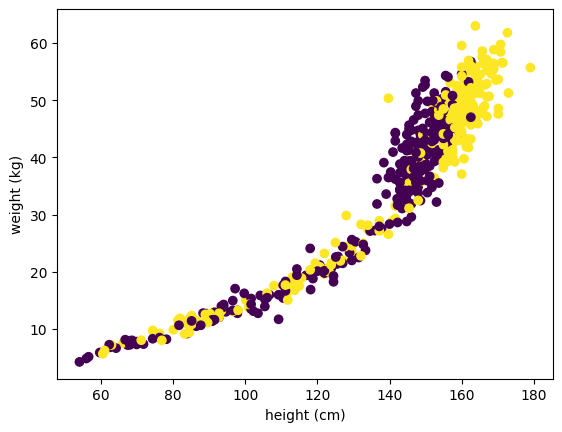

C:\Users\mrpog\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


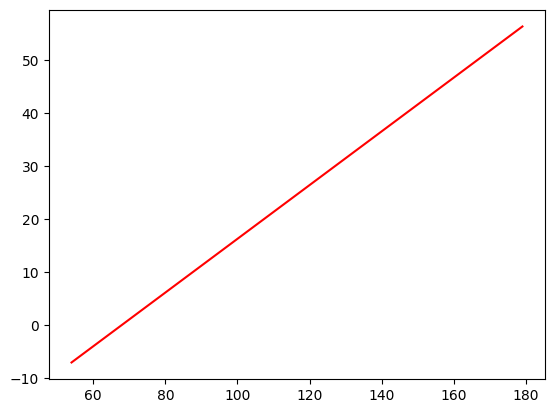

In [33]:
import matplotlib.pyplot as plt
height = howell_full['height']
weight = howell_full['weight']

age = howell_full['age']
gender = howell_full['male']
plt.scatter(height, weight, c=gender)
plt.xlabel('height (cm)')
plt.ylabel('weight (kg)')
plt.show()

min_height = height.min()
max_height = height.max()
points = 200
step_by = (max_height - min_height)/(points-1)

x_values = [min_height + i*step_by for i in range(0, points)]
inputs = [[x] for x in x_values]
y_values = lr_model.predict(inputs)
plt.plot(x_values, y_values, c='red')

### Add a Feature to the Model

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X = train_set[['height', 'age']]
y = train_set['weight']
X_test = test_set[['height', 'age']]
y_test = test_set['weight']

lr_model = LinearRegression()
lr_model.fit(X,y)

fmt = '{:<13} {:}'
y_pred = lr_model.predict(X)
print('Results for linear regression on training data:')
print('Input: Height, age')
print('Default settings')
print('Internal parameters:')
print(fmt.format('Bias:', lr_model.intercept_))
print(fmt.format('Coefficients:', lr_model.coef_))
print(fmt.format('Score:', lr_model.score(X,y)))
print(fmt.format('MAE:', mean_absolute_error(y, y_pred)))
print(fmt.format('RMSE:', np.sqrt(mean_squared_error(y, y_pred))))
print(fmt.format('MSE:', mean_squared_error(y, y_pred)))
print(fmt.format('R^2:', r2_score(y,y_pred)))

y_test_pred = lr_model.predict(X_test)
print()
print('Results for linear regression on test data:')
print('Input: Height, age')
print(fmt.format('MAE:', mean_absolute_error(y_test, y_test_pred)))
print(fmt.format('RMSE:', np.sqrt(mean_squared_error(y_test, y_test_pred))))
print(fmt.format('MSE:', mean_squared_error(y_test, y_test_pred)))
print(fmt.format('R^2:', r2_score(y_test,y_test_pred)))

Results for linear regression on training data:
Input: Height, age
Default settings
Internal parameters:
Bias:         -32.981786351678274
Coefficients: [0.48959129 0.03198353]
Score:        0.8903963296817052
MAE:          3.9844579179380495
RMSE:         4.877023070139709
MSE:          23.78535402667495
R^2:          0.8903963296817052

Results for linear regression on test data:
Input: Height, age
MAE:          4.1967168519461024
RMSE:         5.1834661256248555
MSE:          26.868321075500354
R^2:          0.8738901268956871


### Use Polynomial Regression

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.preprocessing import PolynomialFeatures
power = 3
poly_process = PolynomialFeatures(degree=power, include_bias=False)

X = train_set[['height']]
y = train_set['weight']
X_poly = poly_process.fit_transform(X)

X_test = test_set[['height']]
y_test = test_set['weight']
X_poly_test = poly_process.fit_transform(X_test)

lr_model = LinearRegression()
lr_model.fit(X_poly,y)

fmt = '{:<13} {:}'
y_pred = lr_model.predict(X_poly)
print('Results for linear regression on training data:')
print('Polynomial regression with degree ', power)
print('Default settings')
print('Internal parameters:')
print(fmt.format('Bias:', lr_model.intercept_))
print(fmt.format('Coefficients:', lr_model.coef_))
print(fmt.format('Score:', lr_model.score(X_poly,y)))

print(fmt.format('MAE:', mean_absolute_error(y, y_pred)))
print(fmt.format('RMSE:', np.sqrt(mean_squared_error(y, y_pred))))
print(fmt.format('MSE:', mean_squared_error(y, y_pred)))
print(fmt.format('R^2:', r2_score(y,y_pred)))

y_test_pred = lr_model.predict(X_poly_test)
print()
print('Results for linear regression on test data:')
print(fmt.format('MAE:', mean_absolute_error(y_test, y_test_pred)))
print(fmt.format('RMSE:', np.sqrt(mean_squared_error(y_test, y_test_pred))))
print(fmt.format('MSE:', mean_squared_error(y_test, y_test_pred)))
print(fmt.format('R^2:', r2_score(y_test,y_test_pred)))

Results for linear regression on training data:
Polynomial regression with degree  3
Default settings
Internal parameters:
Bias:         38.7556724913373
Coefficients: [-9.68874202e-01  8.36011255e-03 -1.20345929e-05]
Score:        0.9327619061923518
MAE:          2.9208443646670537
RMSE:         3.8198820894680785
MSE:          14.591499177439012
R^2:          0.9327619061923518

Results for linear regression on test data:
MAE:          3.2929418948562086
RMSE:         4.305579019074048
MSE:          18.538010689490644
R^2:          0.9129894953581679


### Polynomial Regress Graph

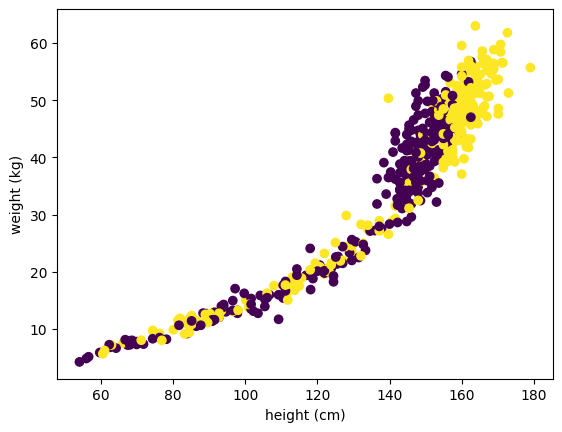

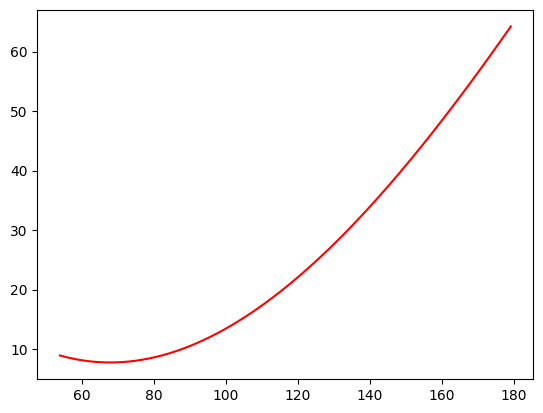

In [39]:
import matplotlib.pyplot as plt
height = howell_full['height']
weight = howell_full['weight']

age = howell_full['age']
gender = howell_full['male']
plt.scatter(height, weight, c=gender)
plt.xlabel('height (cm)')
plt.ylabel('weight (kg)')
plt.show()

min_height = height.min()
max_height = height.max()
points = 200
step_by = (max_height - min_height)/(points-1)

x_values = [min_height + i*step_by for i in range(0, points)]
inputs = [[x] for x in x_values]
inputs_poly = poly_process.fit_transform(inputs)
y_values = lr_model.predict(inputs_poly)
plt.plot(x_values, y_values, c='red')

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.preprocessing import PolynomialFeatures
power = 8
poly_process = PolynomialFeatures(degree=power, include_bias=False)

X = train_set[['height']]
y = train_set['weight']
X_poly = poly_process.fit_transform(X)

X_test = test_set[['height']]
y_test = test_set['weight']
X_poly_test = poly_process.fit_transform(X_test)

lr_model = LinearRegression()
lr_model.fit(X_poly,y)

fmt = '{:<13} {:}'
y_pred = lr_model.predict(X_poly)
print('Results for linear regression on training data:')
print('Polynomial regression with degree ', power)
print('Default settings')
print('Internal parameters:')
print(fmt.format('Bias:', lr_model.intercept_))
print(fmt.format('Coefficients:', lr_model.coef_))
print(fmt.format('Score:', lr_model.score(X_poly,y)))

print(fmt.format('MAE:', mean_absolute_error(y, y_pred)))
print(fmt.format('RMSE:', np.sqrt(mean_squared_error(y, y_pred))))
print(fmt.format('MSE:', mean_squared_error(y, y_pred)))
print(fmt.format('R^2:', r2_score(y,y_pred)))

y_test_pred = lr_model.predict(X_poly_test)
print()
print('Results for linear regression on test data:')
print(fmt.format('MAE:', mean_absolute_error(y_test, y_test_pred)))
print(fmt.format('RMSE:', np.sqrt(mean_squared_error(y_test, y_test_pred))))
print(fmt.format('MSE:', mean_squared_error(y_test, y_test_pred)))
print(fmt.format('R^2:', r2_score(y_test,y_test_pred)))

Results for linear regression on training data:
Polynomial regression with degree  8
Default settings
Internal parameters:
Bias:         30.63149242809086
Coefficients: [-1.05821517e-06 -5.84555772e-05 -1.70146022e-03  6.23656931e-05
 -9.32819356e-07  7.00941619e-09 -2.62048588e-11  3.88233350e-14]
Score:        0.9379323671012915
MAE:          2.6922465598236482
RMSE:         3.670074266018304
MSE:          13.469445118089793
R^2:          0.9379323671012915

Results for linear regression on test data:
MAE:          3.102596139042258
RMSE:         4.257668111722516
MSE:          18.127737749578777
R^2:          0.9149151634430858


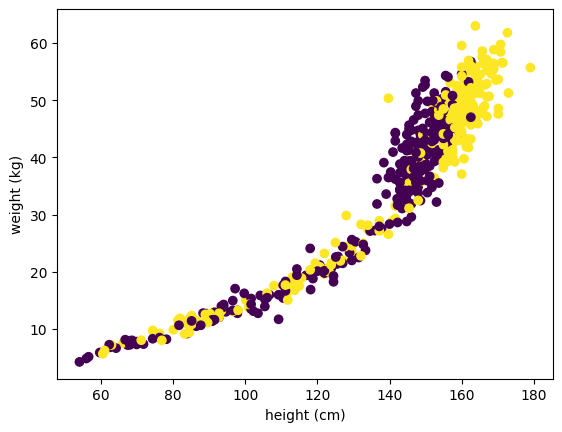

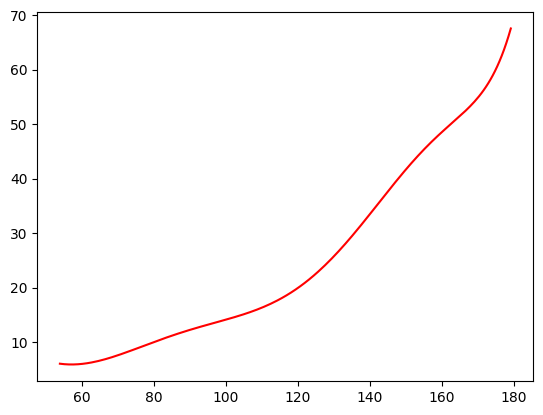

In [41]:
import matplotlib.pyplot as plt
height = howell_full['height']
weight = howell_full['weight']

age = howell_full['age']
gender = howell_full['male']
plt.scatter(height, weight, c=gender)
plt.xlabel('height (cm)')
plt.ylabel('weight (kg)')
plt.show()

min_height = height.min()
max_height = height.max()
points = 200
step_by = (max_height - min_height)/(points-1)

x_values = [min_height + i*step_by for i in range(0, points)]
inputs = [[x] for x in x_values]
inputs_poly = poly_process.fit_transform(inputs)
y_values = lr_model.predict(inputs_poly)
plt.plot(x_values, y_values, c='red')

### Elastic Net with Poly Features

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
power = 8
poly_process = PolynomialFeatures(degree=power, include_bias=False)

X = train_set[['height']]
y = train_set['weight']
X_poly = poly_process.fit_transform(X)

X_test = test_set[['height']]
y_test = test_set['weight']
X_poly_test = poly_process.fit_transform(X_test)

# lr_model
reg_lr_model = ElasticNet(alpha=0.3, l1_ratio=0.5)
reg_lr_model.fit(X_poly,y)

fmt = '{:<13} {:}'
y_pred = reg_lr_model.predict(X_poly)
print('Results for linear regression on training data:')
print('Polynomial regression with degree ', power)
print('Default settings')
print('Internal parameters:')
print(fmt.format('Bias:', reg_lr_model.intercept_))
print(fmt.format('Coefficients:', reg_lr_model.coef_))
print(fmt.format('Score:', reg_lr_model.score(X_poly,y)))

print(fmt.format('MAE:', mean_absolute_error(y, y_pred)))
print(fmt.format('RMSE:', np.sqrt(mean_squared_error(y, y_pred))))
print(fmt.format('MSE:', mean_squared_error(y, y_pred)))
print(fmt.format('R^2:', r2_score(y,y_pred)))

y_test_pred = reg_lr_model.predict(X_poly_test)
print()
print('Results for linear regression on test data:')
print(fmt.format('MAE:', mean_absolute_error(y_test, y_test_pred)))
print(fmt.format('RMSE:', np.sqrt(mean_squared_error(y_test, y_test_pred))))
print(fmt.format('MSE:', mean_squared_error(y_test, y_test_pred)))
print(fmt.format('R^2:', r2_score(y_test,y_test_pred)))

Results for linear regression on training data:
Polynomial regression with degree  8
Default settings
Internal parameters:
Bias:         18.846113403922313
Coefficients: [-2.55756771e-01  6.87204298e-04  8.52528900e-06  3.67563933e-08
  1.17760939e-10  1.01431642e-13 -2.55533600e-15 -3.04757085e-17]
Score:        0.9349092303329695
MAE:          2.873117693405468
RMSE:         3.758391044295953
MSE:          14.125503241844026
R^2:          0.9349092303329695

Results for linear regression on test data:
MAE:          3.22521871336981
RMSE:         4.2163950622270505
MSE:          17.777987320772656
R^2:          0.9165567614450963


C:\Users\mrpog\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.091e+03, tolerance: 9.440e+00
  model = cd_fast.enet_coordinate_descent(


### Elastic Net Graph

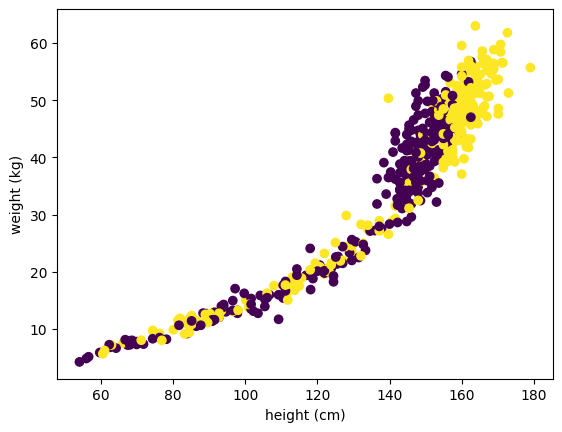

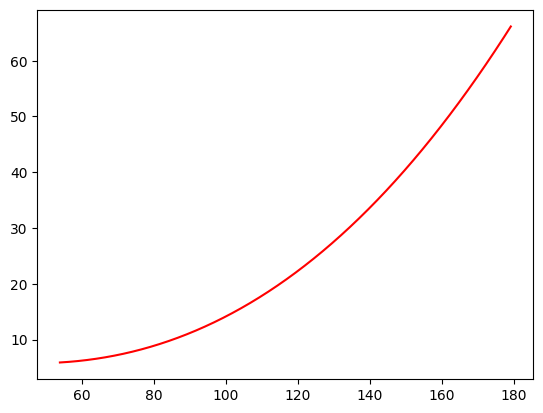

In [51]:
import matplotlib.pyplot as plt

height = howell_full['height']
weight = howell_full['weight']

age = howell_full['age']
gender = howell_full['male']
plt.scatter(height, weight, c=gender)
plt.xlabel('height (cm)')
plt.ylabel('weight (kg)')
plt.show()

min_height = height.min()
max_height = height.max()
points = 200
step_by = (max_height - min_height)/(points-1)

x_values = [min_height + i*step_by for i in range(0, points)]
inputs = [[x] for x in x_values]
inputs_poly = poly_process.fit_transform(inputs)
y_values = reg_lr_model.predict(inputs_poly)
plt.plot(x_values, y_values, c='red')

# Results
Basic results for our regression models to predict weight on
the Howell data.
| Model | Training Features | Set | RMSE | R2 |
|:---|:---|:---|:---|:---|
|Linear Regression|Height|Training|4.90|88.93|
|Linear Regression|Height|Test|5.31|86.77|
|Linear Regression|Height,Age|Training|4.88|89.04|
|Linear Regression|Height,Age|Test|5.18|87.39|
|Polynomial Regression degree 3|Height|Training|3.82|93.28|
|Polynomial Regression degree 3|Height|Test|4.31|91.30|
|Polynomial Regression degree 8|Height|Training|3.67|93.79|
|Polynomial Regression degree 8|Height|Test|4.26|91.50|
|Elastic Net degree 8|Height|Training|3.76|93.49|
|Elastic Net degree 8|Height|Test|4.22|91.66|